# Neural Network application

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np

2022-11-29 17:41:20.182528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load and prepare data:

In [3]:
path = "../data/"
filename = "prep_data.csv"

fetus = pd.read_csv(path+filename)
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]
X = fetus[columns]
y = fetus["NSP"]

# One-hot enconding of target values
y_cat = utils.to_categorical(y-1)

# Split train/test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y_cat,random_state= 45, train_size= 0.8)

## First application

In [4]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu'))
model.add(Dense(y_cat.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                315       
                                                                 
 dense_1 (Dense)             (None, 3)                 48        
                                                                 
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


2022-11-29 17:42:30.397275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.fit(X_train,y_train,verbose=0,epochs=200)

In [6]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

31/31 [==============================] - 0s 964us/step


31/31 [==============================] - 0s 1ms/step
Accuracy with 1 hidden layer1 0.92
Recall with 1 hidden layer1 0.92


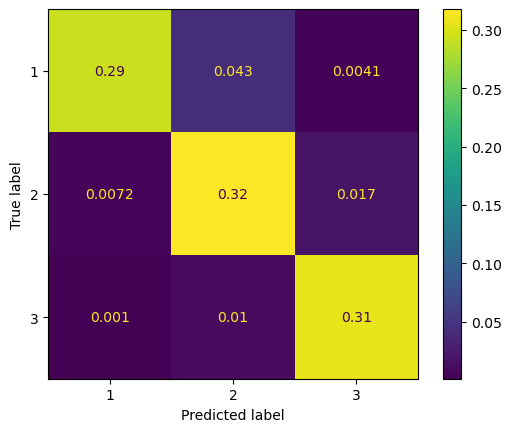

In [8]:
y_pred = model.predict(X_test)

# Apply argmax in order to get the maximum value of probability across the catogories (since we have applied softmax)
y_pred = np.argmax(y_pred,axis=1)

# Just take the correct y (the one with the 1-value since the target has been encoded)
y_compare = np.argmax(y_test,axis=1)


print("Accuracy with 1 hidden layer1 %.2f"%accuracy_score(y_pred,y_compare))
print("Recall with 1 hidden layer1 %.2f"%recall_score(y_pred,y_compare,average="macro"))

cm = confusion_matrix(y_compare, y_pred, normalize="all")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
disp.plot()

### Two hidden layers

14/14 [==============================] - 0s 885us/step
Accuracy with 1 hidden layer1 0.86


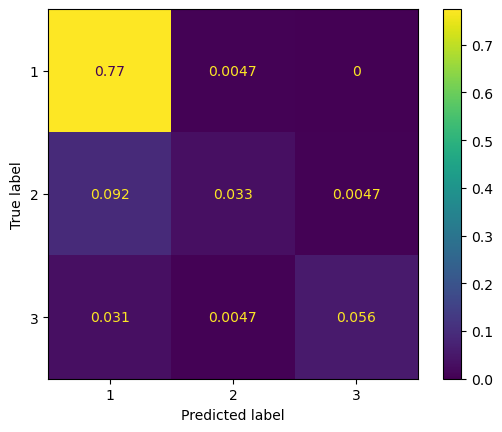

In [7]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(y1_cat.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(X_train,y_train,verbose=0,epochs=100)

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred,axis=1)
y_compare = np.argmax(y_test,axis=1) 

acc = accuracy_score(y_pred,y_compare)
print("Accuracy with 1 hidden layer1 %.2f"%acc)

cm = confusion_matrix(y_compare, y_pred, normalize="all")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
disp.plot()

### Two hidden layers more powerful

14/14 [==============================] - 0s 1ms/step
Accuracy with 1 hidden layer1 0.89


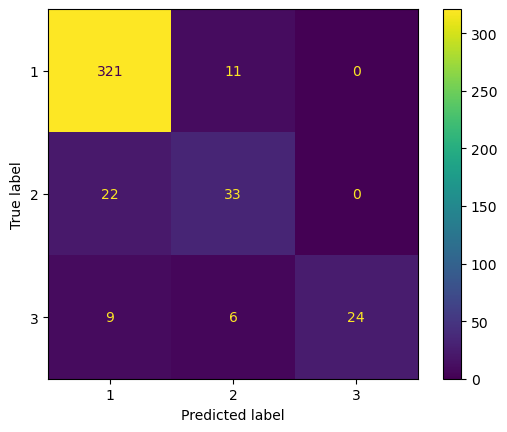

In [8]:
m2h = Sequential()
m2h.add(Dense(30, input_dim=X.shape[1], activation='relu'))
m2h.add(Dense(30, activation='relu'))
m2h.add(Dense(y1_cat.shape[1],activation='softmax'))
m2h.compile(loss='categorical_crossentropy', optimizer='adam')

m2h.fit(X_train,y_train,verbose=0,epochs=100)

y_pred = m2h.predict(X_test)

y_pred = np.argmax(y_pred,axis=1)
y_compare = np.argmax(y_test,axis=1) 

acc = accuracy_score(y_pred,y_compare)
print("Accuracy with 1 hidden layer1 %.2f"%acc)

cm = confusion_matrix(y_compare, y_pred, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
disp.plot()

## Using oversampling

In [9]:
f = fetus[["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency", "NSP"]]

f1 = f[f["NSP"] == 1]
f2 = f[f["NSP"] == 2]
f3 = f[f["NSP"] == 3]

n = 1655

# Oversample the two larger classes
f2_over = f2.sample(n, random_state=34, replace=True)
f3_over = f3.sample(n, random_state=34, replace=True)

# concat the subsamples datasets
f_over = pd.concat([f1,f2_over,f3_over],axis=0,join="outer")
# shuffles the elements
f_over = f_over.sample(frac=1).reset_index(drop=True)

# Define features and target sets
y1_over = f_over["NSP"]
y1_cat_over = utils.to_categorical(y1_over-1)
X_over = f_over.drop(labels="NSP",axis=1)



X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y1_cat_over,random_state= 45, train_size= 0.8)



32/32 [==============================] - 0s 887us/step
Accuracy with 1 hidden layer1 0.92


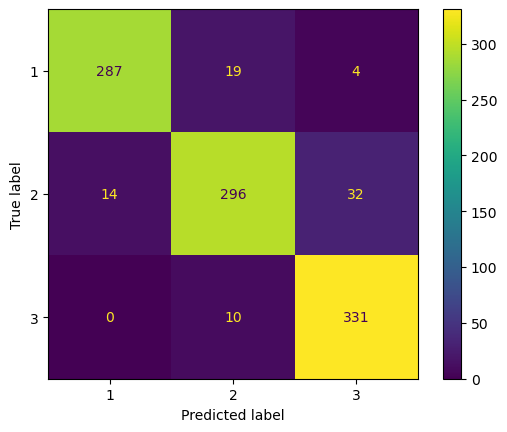

In [10]:
m2h.fit(X_train_over,y_train_over,verbose=0,epochs=100)

y_pred = m2h.predict(X_test_over)

y_pred = np.argmax(y_pred,axis=1)
y_compare = np.argmax(y_test_over,axis=1) 

acc = accuracy_score(y_pred,y_compare)
print("Accuracy with 1 hidden layer1 %.2f"%acc)

cm = confusion_matrix(y_compare, y_pred, normalize=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
disp.plot()